#### Imports

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### 2. Analysis

In [8]:
measures = pd.read_csv('../data/cleaned.csv')

In [9]:
measures.sample(5)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
4,18.5,4.5,46,21.5,15,E10,0,0,0
69,11.8,4.5,37,21.5,4,SP98,1,0,0
367,16.7,3.8,44,24.5,23,SP98,0,0,1
331,16.0,3.8,42,22.0,17,E10,0,0,0
51,10.6,4.9,63,21.5,6,SP98,0,0,0


In [10]:
measures['gas_type'].value_counts()

gas_type
SP98    219
E10     157
Name: count, dtype: int64

In [11]:
measures['AC'].value_counts()

AC
0    346
1     30
Name: count, dtype: int64

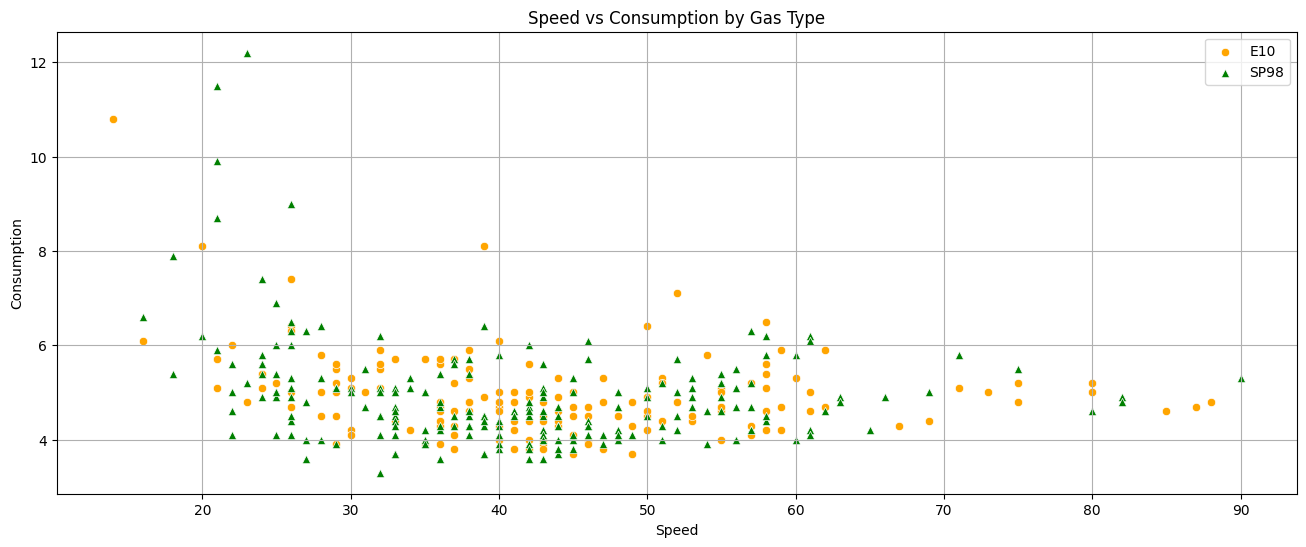

In [13]:
measures.groupby('gas_type')['consume'].agg(['mean', 'max', 'min'])
gas_type_A = measures[measures['gas_type'] == 'E10']
gas_type_B = measures[measures['gas_type'] == 'SP98']

plt.figure(figsize=(16, 6))

sns.scatterplot(x=gas_type_A['speed'], y=gas_type_A['consume'], color='orange', label='E10', marker='o')
sns.scatterplot(x=gas_type_B['speed'], y=gas_type_B['consume'], color='green', label='SP98', marker='^')

plt.title('Speed vs Consumption by Gas Type')
plt.xlabel('Speed')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.show()

From the scatter plot above I can asume that the less speed, the more consumption.

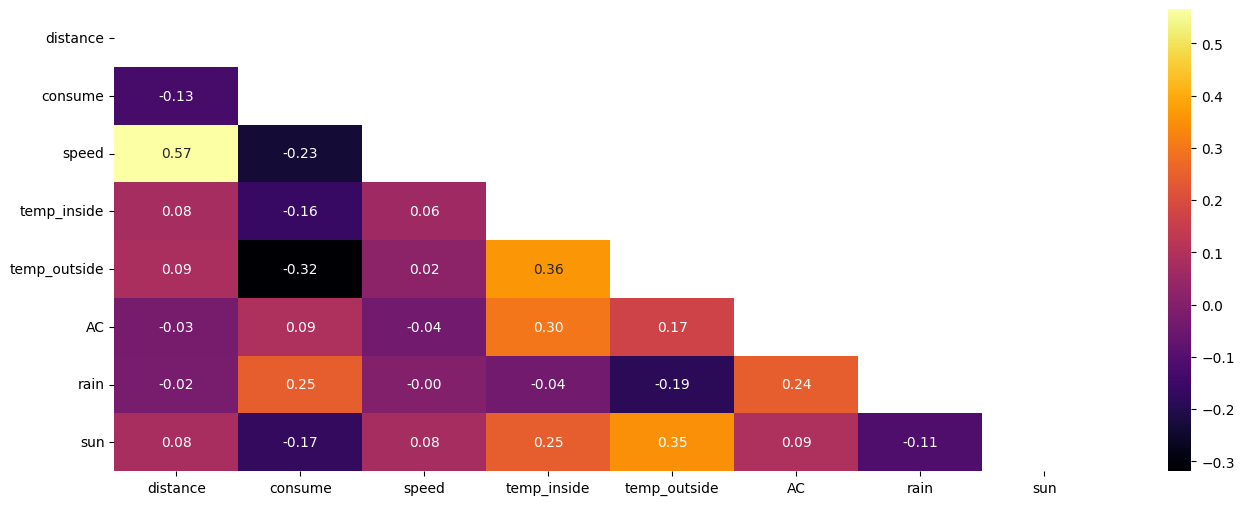

In [16]:
corr = measures.select_dtypes(exclude=['object']).corr()
plt.figure(figsize=(16, 6))
sns.heatmap(corr, annot=True, cmap='inferno', fmt='.2f', mask=np.triu(corr));